In [1]:
import sys, os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    top_k_accuracy_score,
    classification_report,
    confusion_matrix
)
import random
from pathlib import Path

In [2]:
# Compute absolute path to the `src/` folder
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH     = os.path.join(PROJECT_ROOT, "src")

if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)

from utils import get_dataloaders, load_model, evaluate_model, print_metrics, plot_confusion_matrix, show_sample_predictions

In [3]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: cpu


In [4]:
COUNTRIES = ["Albania","Andorra","Argentina","Australia","Austria","Bangladesh","Belgium","Bhutan","Bolivia","Botswana","Brazil","Bulgaria","Cambodia","Canada","Chile","Colombia","Croatia","Czechia","Denmark","Dominican Republic","Ecuador","Estonia","Eswatini","Finland","France","Germany","Ghana","Greece","Greenland","Guatemala","Hungary","Iceland","Indonesia","Ireland","Israel","Italy","Japan","Jordan","Kenya","Kyrgyzstan","Latvia","Lesotho","Lithuania","Luxembourg","Malaysia","Mexico","Mongolia","Montenegro","Netherlands","New Zealand","Nigeria","North Macedonia","Norway","Palestine","Peru","Philippines","Poland","Portugal","Romania","Russia","Senegal","Serbia","Singapore","Slovakia","Slovenia","South Africa","South Korea","Spain","Sri Lanka","Sweden","Switzerland","Taiwan","Thailand","Turkey","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay"]
num_classes = len(COUNTRIES)
project_root   = Path().resolve().parent

## Model on 80 bad images

### Data

In [ ]:
test_root  = project_root/ "data" / "processed_data" / "small_dataset" / "test"
test_loader = get_dataloaders(test_root, batch_size=32)

### Load model

In [ ]:
model = load_model(model_path=project_root / "models" / "resnet_finetuned" / "small_models" / "resnet_finetuned_bs32.pth", device=device)

/Users/michelangelonardi/Desktop/Università/Master/Bocconi Master/Year 1/Semester2/Computer Vision & Image processing/Final - project/rainbot/src/utils.py:212: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues relate

### Evaluation

In [11]:
criterion = nn.CrossEntropyLoss()

In [17]:
avg_loss, top1_acc, all_targets, all_preds, all_probs = evaluate_model(model, test_loader, criterion, device)
print("Average loss:", avg_loss)
print("Top-1 accuracy:", top1_acc)

Average loss: 2.728294968303246
Top-1 accuracy: 0.30253164556962026


In [15]:
print_metrics(all_targets, all_preds, all_probs, COUNTRIES)

Top-3 Accuracy: 0.4975
Top-5 Accuracy: 0.5911

Classification Report:

                      precision    recall  f1-score   support

             Albania       0.25      0.30      0.27        10
             Andorra       0.64      0.70      0.67        10
           Argentina       0.22      0.20      0.21        10
           Australia       0.44      0.40      0.42        10
             Austria       0.50      0.50      0.50        10
          Bangladesh       0.67      0.20      0.31        10
             Belgium       0.00      0.00      0.00        10
              Bhutan       0.50      0.70      0.58        10
             Bolivia       0.10      0.10      0.10        10
            Botswana       0.75      0.90      0.82        10
              Brazil       0.00      0.00      0.00        10
            Bulgaria       0.80      0.40      0.53        10
            Cambodia       0.00      0.00      0.00        10
              Canada       0.12      0.20      0.15        1

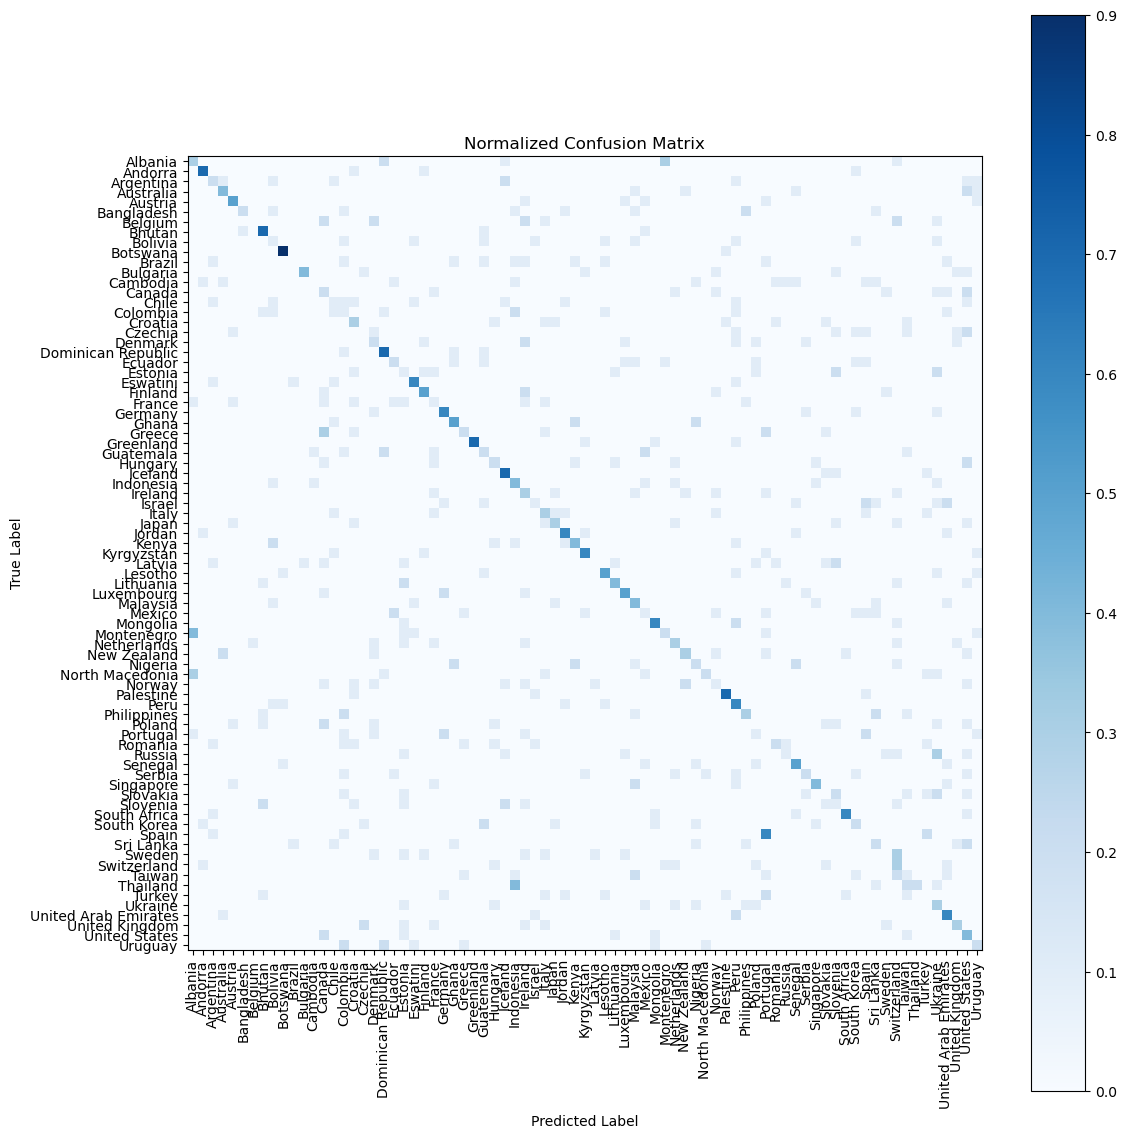

In [18]:
plot_confusion_matrix(all_targets, all_preds, COUNTRIES)

In [20]:
show_sample_predictions(all_targets, all_probs, COUNTRIES, n=5)


Sample predictions (5 examples):

True: Eswatini              ↔  Pred Top-3: Peru (0.40), United Arab Emirates (0.11), Argentina (0.07)
True: Lesotho               ↔  Pred Top-3: Botswana (0.60), Argentina (0.11), Kenya (0.10)
True: Colombia              ↔  Pred Top-3: Lesotho (0.34), Ecuador (0.17), Colombia (0.15)
True: Canada                ↔  Pred Top-3: Ukraine (0.34), United States (0.32), Canada (0.09)
True: South Korea           ↔  Pred Top-3: South Korea (0.28), United Arab Emirates (0.19), Peru (0.08)


## Model on 360 good images

### Data

In [5]:
test_root  = dev_root  = project_root/ "datasets" / "final_datasets" / "test"
test_loader = get_dataloaders(test_root, batch_size=32)

### Load model

In [6]:
model = load_model(model_path=project_root / "models" / "resnet_finetuned" / "main.pth", device=device)

/home/andreafabbricatore/rainbot/src/utils.py:221: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


### Evaluation

In [7]:
criterion = nn.CrossEntropyLoss()

In [ ]:
avg_loss, top1_acc, all_targets, all_preds, all_probs = evaluate_model(model, test_loader, criterion, device)
print("Average loss:", avg_loss)
print("Top-1 accuracy:", top1_acc)

In [27]:
print_metrics(all_targets, all_preds, all_probs, COUNTRIES)

Top-3 Accuracy: 0.4266
Top-5 Accuracy: 0.5911

Classification Report:

                      precision    recall  f1-score   support

             Albania       1.00      0.50      0.67        10
             Andorra       1.00      0.70      0.82        10
           Argentina       0.50      0.30      0.38        10
           Australia       0.00      0.00      0.00        10
             Austria       1.00      0.30      0.46        10
          Bangladesh       1.00      0.10      0.18        10
             Belgium       0.00      0.00      0.00        10
              Bhutan       1.00      0.60      0.75        10
             Bolivia       0.20      0.10      0.13        10
            Botswana       1.00      0.10      0.18        10
              Brazil       0.00      0.00      0.00        10
            Bulgaria       0.00      0.00      0.00        10
            Cambodia       0.50      0.10      0.17        10
              Canada       0.00      0.00      0.00        1

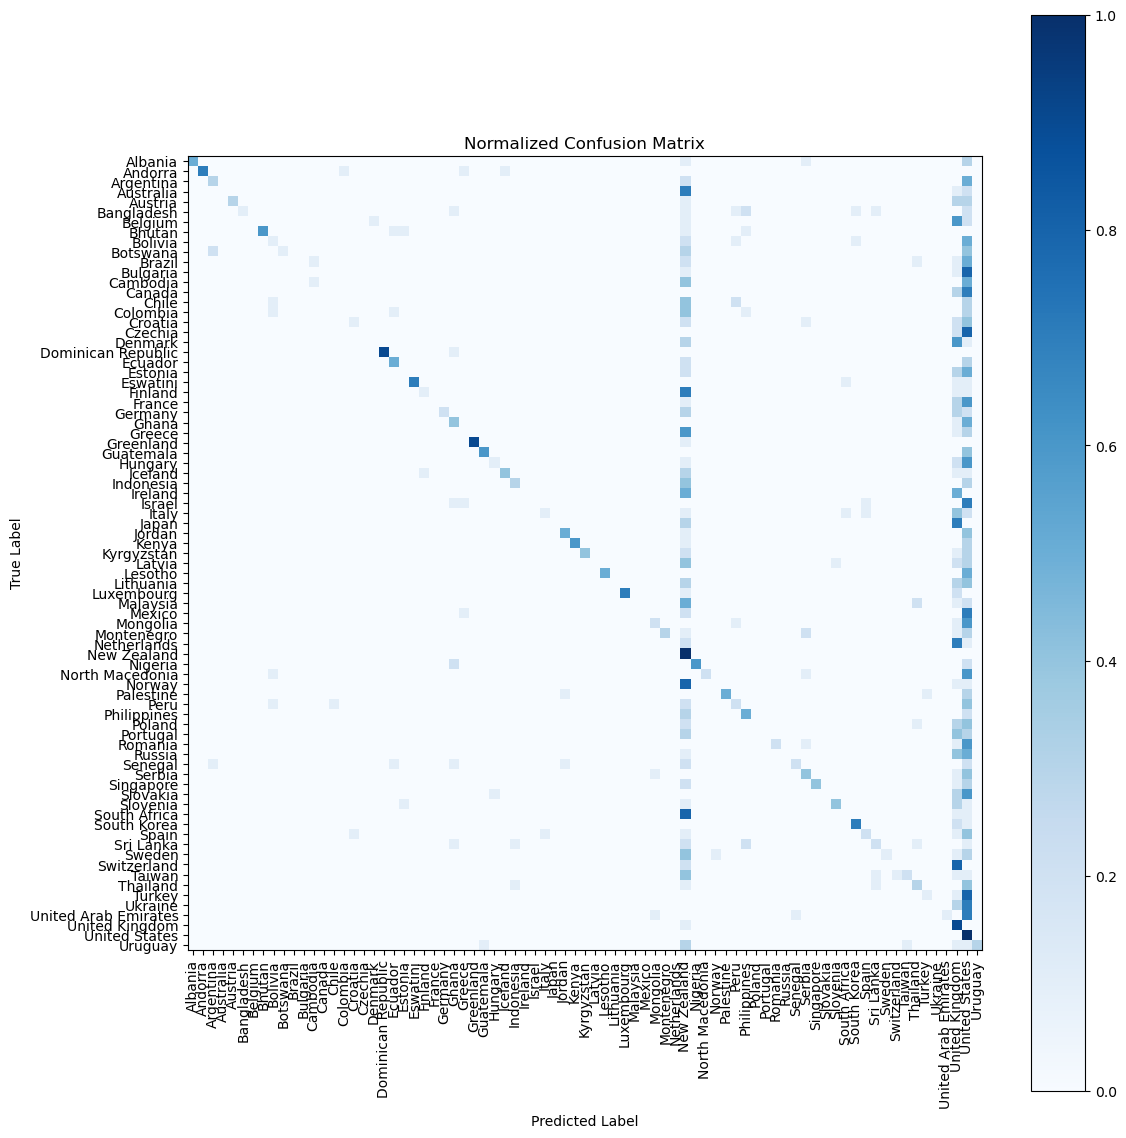

In [28]:
plot_confusion_matrix(all_targets, all_preds, COUNTRIES)

In [29]:
show_sample_predictions(all_targets, all_probs, COUNTRIES, n=5)


Sample predictions (5 examples):

True: Germany               ↔  Pred Top-3: New Zealand (0.35), United States (0.20), United Kingdom (0.14)
True: Austria               ↔  Pred Top-3: Austria (0.41), United Kingdom (0.33), Norway (0.03)
True: Norway                ↔  Pred Top-3: United Kingdom (0.51), New Zealand (0.30), United States (0.08)
True: Netherlands           ↔  Pred Top-3: United Kingdom (0.91), United States (0.06), New Zealand (0.01)
True: Czechia               ↔  Pred Top-3: United States (0.78), United Kingdom (0.20), New Zealand (0.01)
